# Laboratório #4

### Instruções

1. Quando você terminar os exercícios do laboratório, vá ao menu do Jupyter ou Colab e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
2. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este laboratório e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.

**Nome**:

**Matrícula**:

## Exercícios

### 1)  Neste exercício, você irá analisar o desempenho do algoritmo do gradiente descendente para alguns valores do passo de aprendizagem.

O código da célula abaixo, além de conter a definição de algumas funções que iremos utilizar neste exercício, gera valores da seguinte **função observável**

$$y_{noisy}(n) = y(n) + w(n),$$

onde $w$ é vetor coluna com $N = 1000$ (ou seja, o número de exemplos) valores retirados de uma distribuição aleatória Gaussiana Normal Padrão (i.e., com média zero e variância unitária) e $y$ é a **função objetivo**. Neste exercício, a **função objetivo** (ou **modelo gerador**) é dada por:

$$y(n) = x_1(n) + x_2(n),$$

onde $x_1$ e $x_2$ são vetores coluna com $N$ valores retirados da distribuição Gaussiana Normal Padrão.

A **função hipótese** para este exercício é dada por

$$h(n) = \hat{a}_1 x_1(n) + \hat{a}_2 x_2(n).$$

De posse destas informações, faça o seguinte:

#### A. Execute a célula de código abaixo e analise a definição da função `gradientDescentMiniBatch`. Como o próprio nome da função sugere, utilizamos a versão em mini-batches do gradiente descendente (GD).

In [1]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
import random
import results as r

%matplotlib inline

# Reset the pseudo random number generator to the same value.
seed = 42
np.random.seed(seed)
random.seed(seed)

# Generate points for plotting the error surface.
def calculateErrorSurface(X, y_noisy):
    N = len(y_noisy)
    # Generate values for parameters.
    M = 200
    a1 = np.linspace(-20.0, 24.0, M)
    a2 = np.linspace(-20.0, 24.0, M)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
            J[iter1][iter2] = (1.0/N)*np.sum(np.square(y_noisy - yhat))
    return J, A1, A2

# Closed-form solution.
def normalEquationSolution(X, y_noisy):
    N = len(y_noisy)
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))
    yhat = X.dot(a_opt)
    Joptimum = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))
    return a_opt, Joptimum

# Gradient descent solution.
def gradientDescentMiniBatch(X, y_noisy, alpha, n_epochs, mb_size, seed):
    '''
    Função que implementa o algoritmo do gradiente descendente.
    Parâmetros de entrada:
       X: matriz de atributos
       y_noisy: vetor de rótulos (ou valores esperados)
       alpha: valor do passo de aprendizagem
       n_epochs: número máximo de épocas
       mb_size: tamanho do mini-batch
       seed: semente usada para resetar o gerador aleatório
    '''    
    # Extract the number of examples from y.
    N = len(y_noisy)
    
    # Reset PN generator.
    random.seed(seed)
    
    # Random initialization of parameters.
    a = np.array([-20.0, -20.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_epochs*(N//mb_size)+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create array for storing error values.
    Jgd = np.zeros(n_epochs*(N//mb_size)+1)

    Jgd[0] = (1.0/N)*sum(np.power(y_noisy - X.dot(a), 2))

    # Create array for storing gradient values.
    grad_hist = np.zeros((2, n_epochs*(N//mb_size)))

    # Gradient-descent loop.
    inc = 0
    for e in range(n_epochs):

        # Shuffle the whole dataset before every epoch.
        shuffled_indexes = random.sample(range(0, N), N)
        
        for i in range(0, N//mb_size):

            start = i*mb_size
            end = mb_size*(i+1)
            indexes = shuffled_indexes[start:end]

            xi = X[indexes]
            yi = y_noisy[indexes]

            gradients = -(2.0/mb_size)*xi.T.dot(yi - xi.dot(a))
            a = a - alpha*gradients

            Jgd[inc+1] = (1.0/N)*sum(np.power((y_noisy - X.dot(a)), 2))

            grad_hist[:, inc] = gradients.reshape(2,)
            a_hist[:, inc+1] = a.reshape(2,)

            inc += 1
            
    return a, Jgd, a_hist, grad_hist, inc

# Number of examples
N = 1000

# Input values (features)
x1 = np.random.randn(N, 1)
x2 = np.random.randn(N, 1)

# Noise.
w = np.random.randn(N, 1)

# True model.
y = x1 + x2

# Observable function.
y_noisy = y + w

# Concatenate both feature vectors.
X = np.c_[x1,x2]

# Generate values for plotting the error surface.
J, A1, A2 = calculateErrorSurface(X, y_noisy)

# Calculate optimum parameters with closed-form.
a_opt, Joptimum = normalEquationSolution(X, y_noisy)

C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


#### B. Execute a célula de código abaixo e analise os resultados apresentados. Em seguida, responda as seguintes questões:
1. O que você pode dizer sobre o valor escolhido para o passo de aprendizagem? 
2. O que pode ser feito para melhorar o desempenho neste caso?

**DICA**:
* Verifique o número de iterações necessárias para que o algoritmo se aproxime do mínimo global.

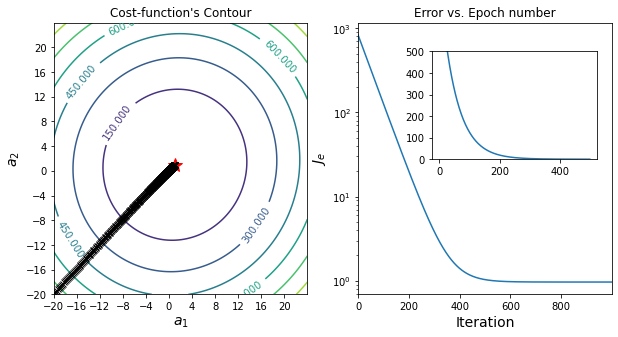

In [2]:
# Number of epochs.
numOfEpochs = 1000

# Learning rate.
alpha = 0.005

# Find solution to the linear regression problem with the gradient descent.
a, Jgd, a_hist, grad_hist, iteration = gradientDescentMiniBatch(X, y_noisy, alpha, numOfEpochs, N, seed)

# Plot results.
r.plotResults(Jgd, J, A1, A2, a_opt, a_hist, iteration, 500, 500)

<span style="color:blue">Escreva abaixo sua análise sobre o que está ocorrendo nos resultados acima.</span>

* Respostas:


#### C. Execute a célula de código abaixo e analise os resultados apresentados. Em seguida, responda as seguintes questões:
1. O que você pode dizer sobre o valor escolhido para o passo de aprendizagem? 
2. O que pode ser feito para melhorar o desempenho neste caso?

**DICAS**:
+ Sabendo que o vetor de pesos é inicializado com os valores $a_1 = -20$ e $a_2 = -20$, verifique a trajetoria das atualizações dos pesos. O algoritmo vai diretamente para o ponto de mínimo global como no exercício anterior?
+ O valor do erro diminui até que se torne constante como no exercício anterior?

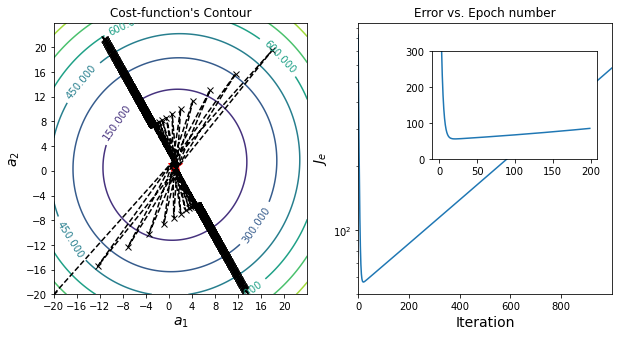

In [3]:
# Number of epochs.
numOfEpochs = 1000

# Learning rate.
alpha = 0.9793

# Find solution to the linear regression problem with the gradient descent.
a, Jgd, a_hist, grad_hist, iteration = gradientDescentMiniBatch(X, y_noisy, alpha, numOfEpochs, N, seed)

# Plot results.
r.plotResults(Jgd, J, A1, A2, a_opt, a_hist, iteration, 200, 300)

<span style="color:blue">Escreva abaixo sua análise sobre o que está ocorrendo nos resultados acima.</span>

* Respostas:


#### D. Execute a célula de código abaixo e analise os resultados apresentados. Em seguida, responda as seguintes questões:
1. O que você pode dizer sobre o valor escolhido para o passo de aprendizagem? 
2. O que pode ser feito para melhorar o desempenho neste caso?

**DICAS**:
+ Sabendo que o vetor de pesos é inicializado com os valores $a_1 = -20$ e $a_2 = -20$, verifique a trajetoria das atualizações dos pesos. O algoritmo vai diretamente para o ponto de mínimo global?
+ Verifique o número de iterações necessárias para que o algoritmo se aproxime do ponto de mínimo global.
+ O valor do erro diminui até que se torne constante?

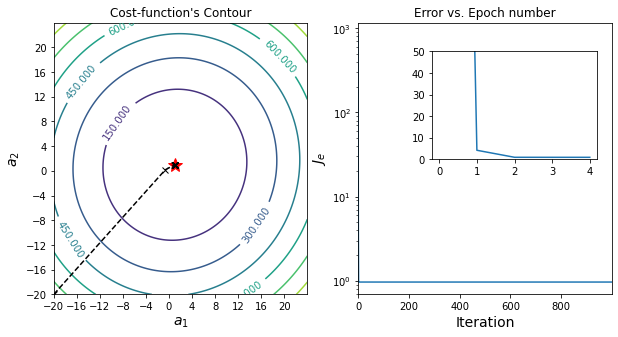

In [4]:
# Number of epochs.
numOfEpochs = 1000

# Learning rate.
alpha = 0.5

# Find solution to the linear regression problem with the gradient descent.
a, Jgd, a_hist, grad_hist, iteration = gradientDescentMiniBatch(X, y_noisy, alpha, numOfEpochs, N, seed)

# Plot results.
r.plotResults(Jgd, J, A1, A2, a_opt, a_hist, iteration, 5, 50)

<span style="color:blue">Escreva abaixo sua análise sobre o que está ocorrendo nos resultados acima.</span>

* Respostas:


### 2) Neste exercício, você irá analisar o desempenho do algoritmo do gradiente descendente estocástico (GDE) sem e com redução do passo de aprendizagem. Utilizaremos as mesmas funções **observável** e **hipótese** do exercício anterior.

#### A. Execute a célula de código abaixo e analise a definição da função `gradientDescentLearningRateDecay`. Observe que utilizamos novamente a versão em mini-batches do GD, porém, desta vez, temos também a adição de um esquema de redução do passo de aprendizagem.

In [5]:
import math as m

# Gradient descent solution.
def gradientDescentLearningRateDecay(X, y_noisy, alpha_init, n_epochs, mb_size, lrd, seed):
    '''
    Função que implementa o algoritmo do gradiente descendente.
    Parâmetros de entrada:
       X: matriz de atributos
       y_noisy: vetor de rótulos (ou valores esperados)
       alpha_init: valor inicial do passo de aprendizagem
       n_epochs: número máximo de épocas
       mb_size: tamanho do mini-batch
       lrd: tipo de redução do passo de aprendizagem (learning rate decay)
       seed: semente usada para resetar o gerador aleatório
    '''    
    # Extract the number of examples from y.
    N = len(y_noisy)
    
    # Reset PN generator.
    random.seed(seed)
    
    # Random initialization of parameters.
    a = np.array([-20.0, -20.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_epochs*(N//mb_size)+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create array for storing error values.
    Jgd = np.zeros(n_epochs*(N//mb_size)+1)

    Jgd[0] = (1.0/N)*sum(np.power(y_noisy - X.dot(a), 2))

    # Create array for storing gradient values.
    grad_hist = np.zeros((2, n_epochs*(N//mb_size)))
    
    # Create array for storing past alpha values.
    alpha_hist = np.zeros((n_epochs*(N//mb_size),))

    # Gradient-descent loop.
    inc = 0
    for e in range(n_epochs):

        # Shuffle the whole dataset before every epoch.
        shuffled_indexes = random.sample(range(0, N), N)
        
        for i in range(0, N//mb_size):

            start = i*mb_size
            end = mb_size*(i+1)
            indexes = shuffled_indexes[start:end]

            xi = X[indexes]
            yi = y_noisy[indexes]
            
            alpha = learning_schedule(lrd, alpha_init, inc)
        
            gradient = -(2.0/mb_size)*xi.T.dot(yi - xi.dot(a))
            update = alpha*gradient
            a = a - update

            Jgd[inc+1] = (1.0/N)*sum(np.power((y_noisy - X.dot(a)), 2))

            grad_hist[:, inc] = gradient.reshape(2,)
            a_hist[:, inc+1] = a.reshape(2,)
            
            alpha_hist[inc] = alpha

            inc += 1
            
    return a, Jgd, a_hist, grad_hist, alpha_hist, inc

# learning schedule: Gradual decay.
def stepDecay(alpha_init, t, epochs_drop=15.0):
    drop = 0.5
    alpha = alpha_init * m.pow(drop, m.floor((1+t)/epochs_drop))
    return alpha

def learning_schedule(lrd, alpha_init, t):
    alpha = alpha_init
    if(lrd=='step'):
        alpha = stepDecay(alpha_init, t)
    return alpha

#### B. Execute a célula de código abaixo e analise os resultados apresentados. Em seguida, responda as seguintes questões:
1. O passo de aprendizagem é fixo ou está sendo reduzido a cada iteração do algoritmo?
2. O algoritmo converge e se estabiliza no ponto de mínimo global?
3. Podemos dizer que o GDE utiliza uma aproximação ruidosa do gradiente?

**DICAS**:
* Para responder a questão 1 deste item, verifique o gráfico que mostra o valor de $\alpha$ a cada iteração do algoritmo do gradiente descendente estocástico.
* Para responder as questões 2 e 3 deste item, analise os resultados mostrados nas figuras *Cost-function's Contour* e *Error vs. Epoch number* apresentadas abaixo.

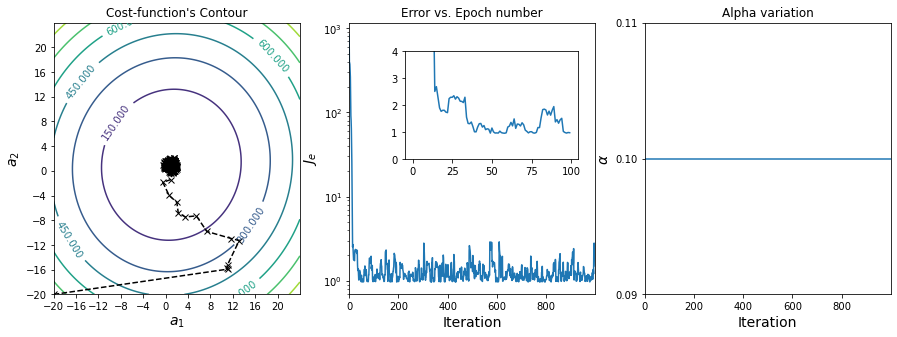

In [6]:
# Number of epochs.
numOfEpochs = 1

# Initial learning rate.
alpha_init = 0.1

# Find solution to the linear regression problem with the gradient descent.
a, Jgd, a_hist, grad_hist, alpha_hist, iteration = gradientDescentLearningRateDecay(X, y_noisy, alpha_init, numOfEpochs, 1, 'none', seed)

# Plot results.
r.plotResults2(Jgd, J, A1, A2, a_opt, a_hist, alpha_hist, iteration, 100, 4)

<span style="color:blue">Escreva abaixo sua respostas.</span>

* Respostas:


#### C. Execute a célula de código abaixo e analise os resultados apresentados. Em seguida, responda as seguintes questões:
1. O passo de aprendizagem é fixo ou está sendo reduzido a cada iteração do algoritmo? 
2. Qual estratégia de **redução programada** está sendo utilizada neste exercício?
3. O algoritmo converge e se estabiliza no ponto de mínimo global?
4. Se o GDE usa uma aproximação ruidosa do vetor gradiente, como foi possível que ele se estabilizasse no ponto de mínimo global?
5. Qual é o número de iterações usado no exercício para se reduzir o passo de aprendizagem?
6. Qual é o fator utilizado para se reduzir o passo de aprendizagem?

**DICAS**:
* Para responder a questão 1 deste item, verifique o gráfico que mostra o valor de $\alpha$ a cada iteração do algoritmo do gradiente descendente estocástico.
* Para responder a questão 2 deste item, analise o código do item **A**.
* Para responder a questão 3 deste item, analise os resultados mostrados nas figuras *Cost-function's Contour* e *Error vs. Epoch number* apresentadas abaixo.
* Para responder a questão 4 deste item, analise os resultados mostrados nas figuras *Error vs. Epoch number* e *Alpha variation* apresentadas abaixo.
* Para responder as questões 5 e 6 deste item, analise o resultado mostrado na figura *Alpha variation* apresentada abaixo. Veja a figura onde se tem um **zoom** das primeiras 30 iterações do algoritmo. Você também pode analisar o código do item **A** para responder as questões 5 e 6.

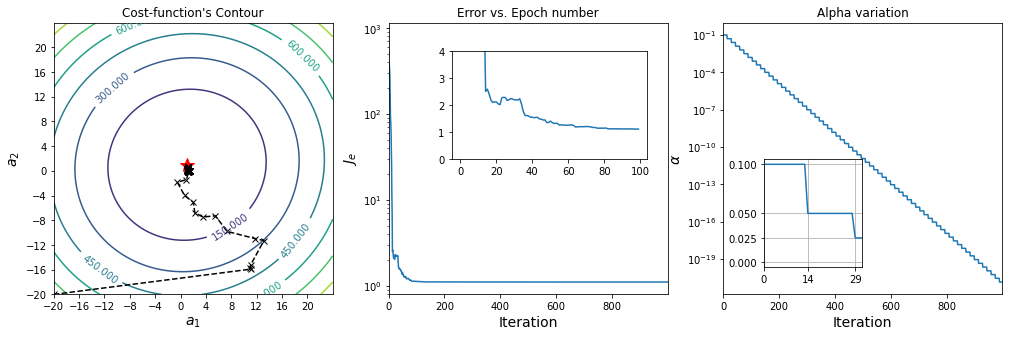

In [7]:
# Number of epochs.
numOfEpochs = 1

# Initial learning rate.
alpha_init = 0.1

# Find solution to the linear regression problem with the gradient descent.
a, Jgd, a_hist, grad_hist, alpha_hist, iteration = gradientDescentLearningRateDecay(X, y_noisy, alpha_init, numOfEpochs, 1, 'step', seed)

# Plot results.
r.plotResults3(Jgd, J, A1, A2, a_opt, a_hist, alpha_hist, iteration, 100, 4)

<span style="color:blue">Escreva abaixo sua respostas.</span>

* Respostas:
